# Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot
import seaborn as sns

# Tratamento dos dados

In [2]:
new_names = ['buying','maint','doors','persons','lug_boot', 'safety', 'classvalues']
dataset = pd.read_csv("Dataset\car.data", names = new_names, skiprows=0, delimiter=',')

In [3]:
for i in range(1728):
    if dataset.buying[i] == "vhigh":
        dataset.buying[i] = 1
    if dataset.buying[i] == "high":
        dataset.buying[i] = 2
    if dataset.buying[i] == "med":
        dataset.buying[i] = 3
    if dataset.buying[i] == "low":
        dataset.buying[i] = 4
    if dataset.doors[i] == "5more":
        dataset.doors[i] = 5
    if dataset.persons[i] == "more":
        dataset.persons[i] = 6
    if dataset.lug_boot[i] == "small":
        dataset.lug_boot[i] = 1
    if dataset.lug_boot[i] == "big":
        dataset.lug_boot[i] = 3
    if dataset.lug_boot[i] == "med":
        dataset.lug_boot[i] = 2
    if dataset.safety[i] == "high":
        dataset.safety[i] = 1
    if dataset.safety[i] == "med":
        dataset.safety[i] = 2
    if dataset.safety[i] == "low":
        dataset.safety[i] = 3
    if dataset.maint[i] == "vhigh":
        dataset.maint[i] = 1
    if dataset.maint[i] == "high":
        dataset.maint[i] = 2
    if dataset.maint[i] == "med":
        dataset.maint[i] = 3
    if dataset.maint[i] == "low":
        dataset.maint[i] = 4
    if dataset.classvalues[i] == "unacc":
        dataset.classvalues[i] = 1
    if dataset.classvalues[i] == "acc":
        dataset.classvalues[i] = 2
    if dataset.classvalues[i] == "good":
        dataset.classvalues[i] = 3
    if dataset.classvalues[i] == "vgood":
        dataset.classvalues[i] = 4


In [4]:
dataset.head(10)


,buying,maint,doors,persons,lug_boot,safety,classvalues
0,1,1,2,2,1,3,1
1,1,1,2,2,1,2,1
2,1,1,2,2,1,1,1
3,1,1,2,2,2,3,1
4,1,1,2,2,2,2,1
5,1,1,2,2,2,1,1
6,1,1,2,2,3,3,1
7,1,1,2,2,3,2,1
8,1,1,2,2,3,1,1
9,1,1,2,4,1,3,1


In [5]:
dataset.to_csv('carModificado.data')

C:\Users\milai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classvalues', ylabel='count'>

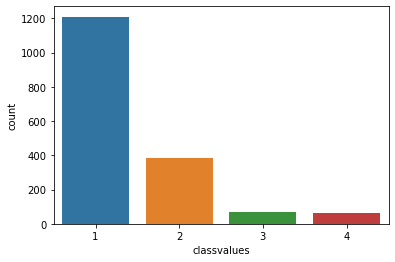

In [22]:
sns.countplot(dataset['classvalues'])

# MLP

## Adaptação dos dados

In [6]:
dataset = pd.read_csv("carModificado.data")
dataset.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,classvalues
0,0,1,1,2,2,1,3,1
1,1,1,1,2,2,1,2,1
2,2,1,1,2,2,1,1,1
3,3,1,1,2,2,2,3,1
4,4,1,1,2,2,2,2,1


In [7]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

x = dataset.drop(['classvalues'], axis=1)

y = dataset['classvalues']

x.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,2,2,1,3
1,1,1,2,2,1,2
2,1,1,2,2,1,1
3,1,1,2,2,2,3
4,1,1,2,2,2,2


### Variaveis de teste e treinamento

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

## Criação do modelo

In [9]:
Model = MLPClassifier(hidden_layer_sizes=(21,42), activation='relu', max_iter=8000, alpha=0.01,
                     solver='adam', verbose=0,  random_state=121) 

In [10]:
h = Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

#agora vou utilizar as funções de classificação estatística

print(classification_report(y_test,y_pred)) # Print summary report

# Print accuracy score
print('accuracy score: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       374
           2       0.89      0.93      0.91       115
           3       0.89      0.67      0.76        12
           4       1.00      0.89      0.94        18

    accuracy                           0.96       519
   macro avg       0.94      0.87      0.90       519
weighted avg       0.96      0.96      0.96       519

accuracy score:  0.9576107899807321


## Plots

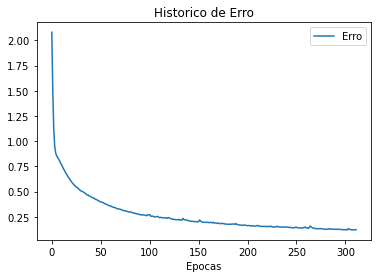

In [11]:
plt.plot(h.loss_curve_)
plt.title('Historico de Erro')
plt.xlabel('Epocas')
plt.legend(['Erro'])

# Som (Self Organizing Map)

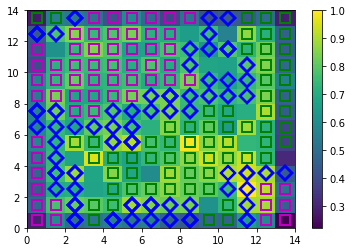

In [15]:
X = dataset.iloc[:,1:22].values
y = dataset.iloc[:,5].values

normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

som = MiniSom(x = 14, y = 14, input_len = 6, sigma = 1.0, learning_rate = 0.5, random_seed = 2)
som.random_weights_init(X) #Inicialização dos pesos 
som.train_random(data = X, num_iteration = 20000) #Treinamento


q = som.activation_response(X)

pcolor(som.distance_map().T) #matiz com os valores de distancias (invertida)
# MID - mean inter neuron distance
colorbar() #escala da distancia (mais clara)

markers = ['o', 's', 'D', 's']
color = ['r', 'g', 'b', 'm']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)

In [16]:
som._weights # pesos do som

array([[[1.61470727e-01, 1.10964374e-01, 9.96941811e-01, 1.00000000e+00,
         9.99999985e-01, 8.62739541e-09],
        [2.81358690e-01, 1.08088077e-02, 5.09755389e-01, 9.99951000e-01,
         9.99901194e-01, 6.60924011e-08],
        [1.69306367e-02, 1.51194761e-01, 1.75597681e-02, 9.92056017e-01,
         9.92127680e-01, 3.53646968e-07],
        ...,
        [8.04684755e-01, 9.11656840e-01, 2.21156100e-03, 5.00098778e-01,
         9.94106204e-01, 3.23973792e-28],
        [8.46064117e-01, 8.76100695e-01, 9.33759572e-09, 5.07146008e-01,
         5.00976253e-01, 5.20455133e-33],
        [7.83149790e-01, 8.52812657e-01, 2.32289919e-15, 5.06189189e-01,
         7.15297246e-03, 1.81142002e-35]],

       [[1.61582766e-01, 8.55127294e-01, 9.97776154e-01, 1.00000000e+00,
         9.96295002e-01, 2.39650846e-03],
        [1.99634355e-01, 3.54990022e-01, 5.16621696e-01, 9.99999274e-01,
         9.85263076e-01, 2.56987147e-03],
        [1.28177684e-01, 2.05530242e-01, 4.69410577e-01, 9.995275

In [17]:
som._activation_map #valores mapa autorganizavel 

array([[1.86909737, 1.93263721, 2.15324505, 1.97704731, 2.21098685,
        2.03235822, 2.10960833, 1.98719098, 2.13138973, 1.96514058,
        1.63385538, 1.81098943, 1.591518  , 1.5207197 ],
       [1.6467401 , 1.80440788, 1.71207948, 1.87816251, 1.90802948,
        1.87795284, 1.88977236, 1.8201971 , 1.98612391, 1.80207257,
        1.58554068, 1.5649073 , 1.5024838 , 1.43783967],
       [1.18935399, 1.43360489, 1.47593528, 1.83909833, 1.71951269,
        1.94797964, 1.92202877, 2.02946574, 1.83930653, 1.74303349,
        1.50617997, 1.51306595, 1.75245398, 1.60562865],
       [1.25193067, 1.31238784, 1.44208044, 1.67849393, 1.65320845,
        1.74419085, 2.05896466, 2.13686238, 1.93114635, 1.77882005,
        1.54696577, 1.44125667, 1.55408408, 1.96883849],
       [1.40098564, 1.58298923, 1.62646468, 1.83448962, 1.67812593,
        1.74422298, 1.76090044, 1.70616678, 2.05471232, 1.89429103,
        1.73042779, 1.67030441, 1.69457651, 1.76322122],
       [1.6953294 , 1.55561123, 1.4

In [19]:
q #vezes que os neuronios foram acessados bmu

array([[16.,  8.,  8., 12.,  8., 16.,  8., 16.,  8., 16.,  8., 12., 16.,
        16.],
       [16.,  8.,  6., 16.,  8.,  8.,  8., 12.,  8.,  8.,  8.,  0.,  8.,
        16.],
       [16., 16., 10., 11.,  0., 12.,  4.,  8.,  8.,  8.,  8.,  8., 16.,
        12.],
       [ 7.,  7.,  0.,  0.,  8., 16.,  8., 16.,  8.,  8.,  8., 16.,  8.,
        12.],
       [16.,  8.,  8., 16.,  8., 12.,  8.,  8.,  8., 16.,  8., 16.,  8.,
         8.],
       [ 8., 16.,  6.,  6.,  4., 16., 12.,  8., 16.,  8.,  8.,  4., 16.,
        12.],
       [ 8., 16.,  8.,  0.,  4., 13.,  0.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.],
       [10.,  9.,  9., 10.,  3.,  9.,  8.,  8., 16.,  8.,  4.,  8., 12.,
         8.],
       [14.,  7.,  6.,  7.,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  0.,
        16.],
       [ 8.,  0.,  9., 10.,  9.,  6.,  8.,  8.,  8.,  8.,  0.,  8.,  8.,
         8.],
       [ 8.,  8.,  6.,  3.,  9.,  8.,  6.,  4.,  8.,  5.,  0., 16.,  0.,
         8.],
       [13.,  5.,  5.,  9., 12.,  0., 16., 